In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('combined_lab_testsV5.csv')
df.head()

,Sample ID,Patient Name,Gender,DOB,Test Name,Unit,Category,Result,DOS,Standard Test Name,Lab,Age,Outcome
0,118,Xalil Ahmad Mhamad,Male,16/04/1959,Blood Sugar,mg/dl,Diabetes Test,95,16/04/2023,Blood Sugar,Biolab,64.0,n
1,126,Dyar Omar,Male,16/04/1986,Blood Sugar,mg/dl,Diabetes Test,86,16/04/2023,Blood Sugar,Biolab,37.0,n
2,132,Fatah Mhamad Qadr,Male,16/04/1970,Blood Sugar,mg/dl,Diabetes Test,84,16/04/2023,Blood Sugar,Biolab,53.0,n
3,177,Sesna Qubad Anwar,Female,17/04/1973,Blood Sugar,mg/dl,Diabetes Test,84,17/04/2023,Blood Sugar,Biolab,50.0,n
4,179,Bayan Abdulla Abdurahman,Female,17/04/1981,Blood Sugar,mg/dl,Diabetes Test,96,17/04/2023,Blood Sugar,Biolab,42.0,n


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157361 entries, 0 to 157360
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Sample ID           157361 non-null  int64  
 1   Patient Name        157361 non-null  object 
 2   Gender              157361 non-null  object 
 3   DOB                 157361 non-null  object 
 4   Test Name           157361 non-null  object 
 5   Unit                141800 non-null  object 
 6   Category            157361 non-null  object 
 7   Result              157361 non-null  object 
 8   DOS                 157361 non-null  object 
 9   Standard Test Name  157361 non-null  object 
 10  Lab                 157361 non-null  object 
 11  Age                 157321 non-null  float64
 12  Outcome             157361 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 15.6+ MB


In [30]:
# Check current Sample ID ranges by Lab
print("Sample ID ranges by Lab BEFORE modification:")
for lab in df['Lab'].unique():
    lab_data = df[df['Lab'] == lab]
    print(f"{lab}: {lab_data['Sample ID'].min()} - {lab_data['Sample ID'].max()}")

# Modify Sample ID by adding offset for each lab
for i, lab in enumerate(df['Lab'].unique()):
    df.loc[df['Lab'] == lab, 'Sample ID'] = df.loc[df['Lab'] == lab, 'Sample ID'] + (100000 * i)

print("\nSample ID ranges by Lab AFTER modification:")
for lab in df['Lab'].unique():
    lab_data = df[df['Lab'] == lab]
    print(f"{lab}: {lab_data['Sample ID'].min()} - {lab_data['Sample ID'].max()}")

Sample ID ranges by Lab BEFORE modification:
Biolab: 85 - 38248
Darugha: 13216 - 13769
Hawkari: 2383 - 26995

Sample ID ranges by Lab AFTER modification:
Biolab: 85 - 38248
Darugha: 113216 - 113769
Hawkari: 202383 - 226995


In [20]:
# Removing unrealistic Ages and null values in Age
print(f"Original dataset size: {df.shape}")
df = df[(df['Age'] >= 0) ]
df = df.dropna(subset=['Age'])
print(f"Filtered dataset size: {df.shape}")

Original dataset size: (157361, 13)
Filtered dataset size: (157242, 13)


In [21]:
print(f"Original dataset size: {df.shape}")
# Remove records where Date of Birth equals Date of Service (same day testing scenario)
df = df[(df['DOB'] != df['DOS'])]
print(f"Filtered dataset size: {df.shape}")

Original dataset size: (157242, 13)
Filtered dataset size: (156156, 13)


In [ ]:
# change n => normal and an and bn => abnormal
df['Outcome'] = df['Outcome'].replace({'n': 'normal', 'an': 'abnormal', 'bn': 'abnormal'})
df['Outcome'].value_counts()

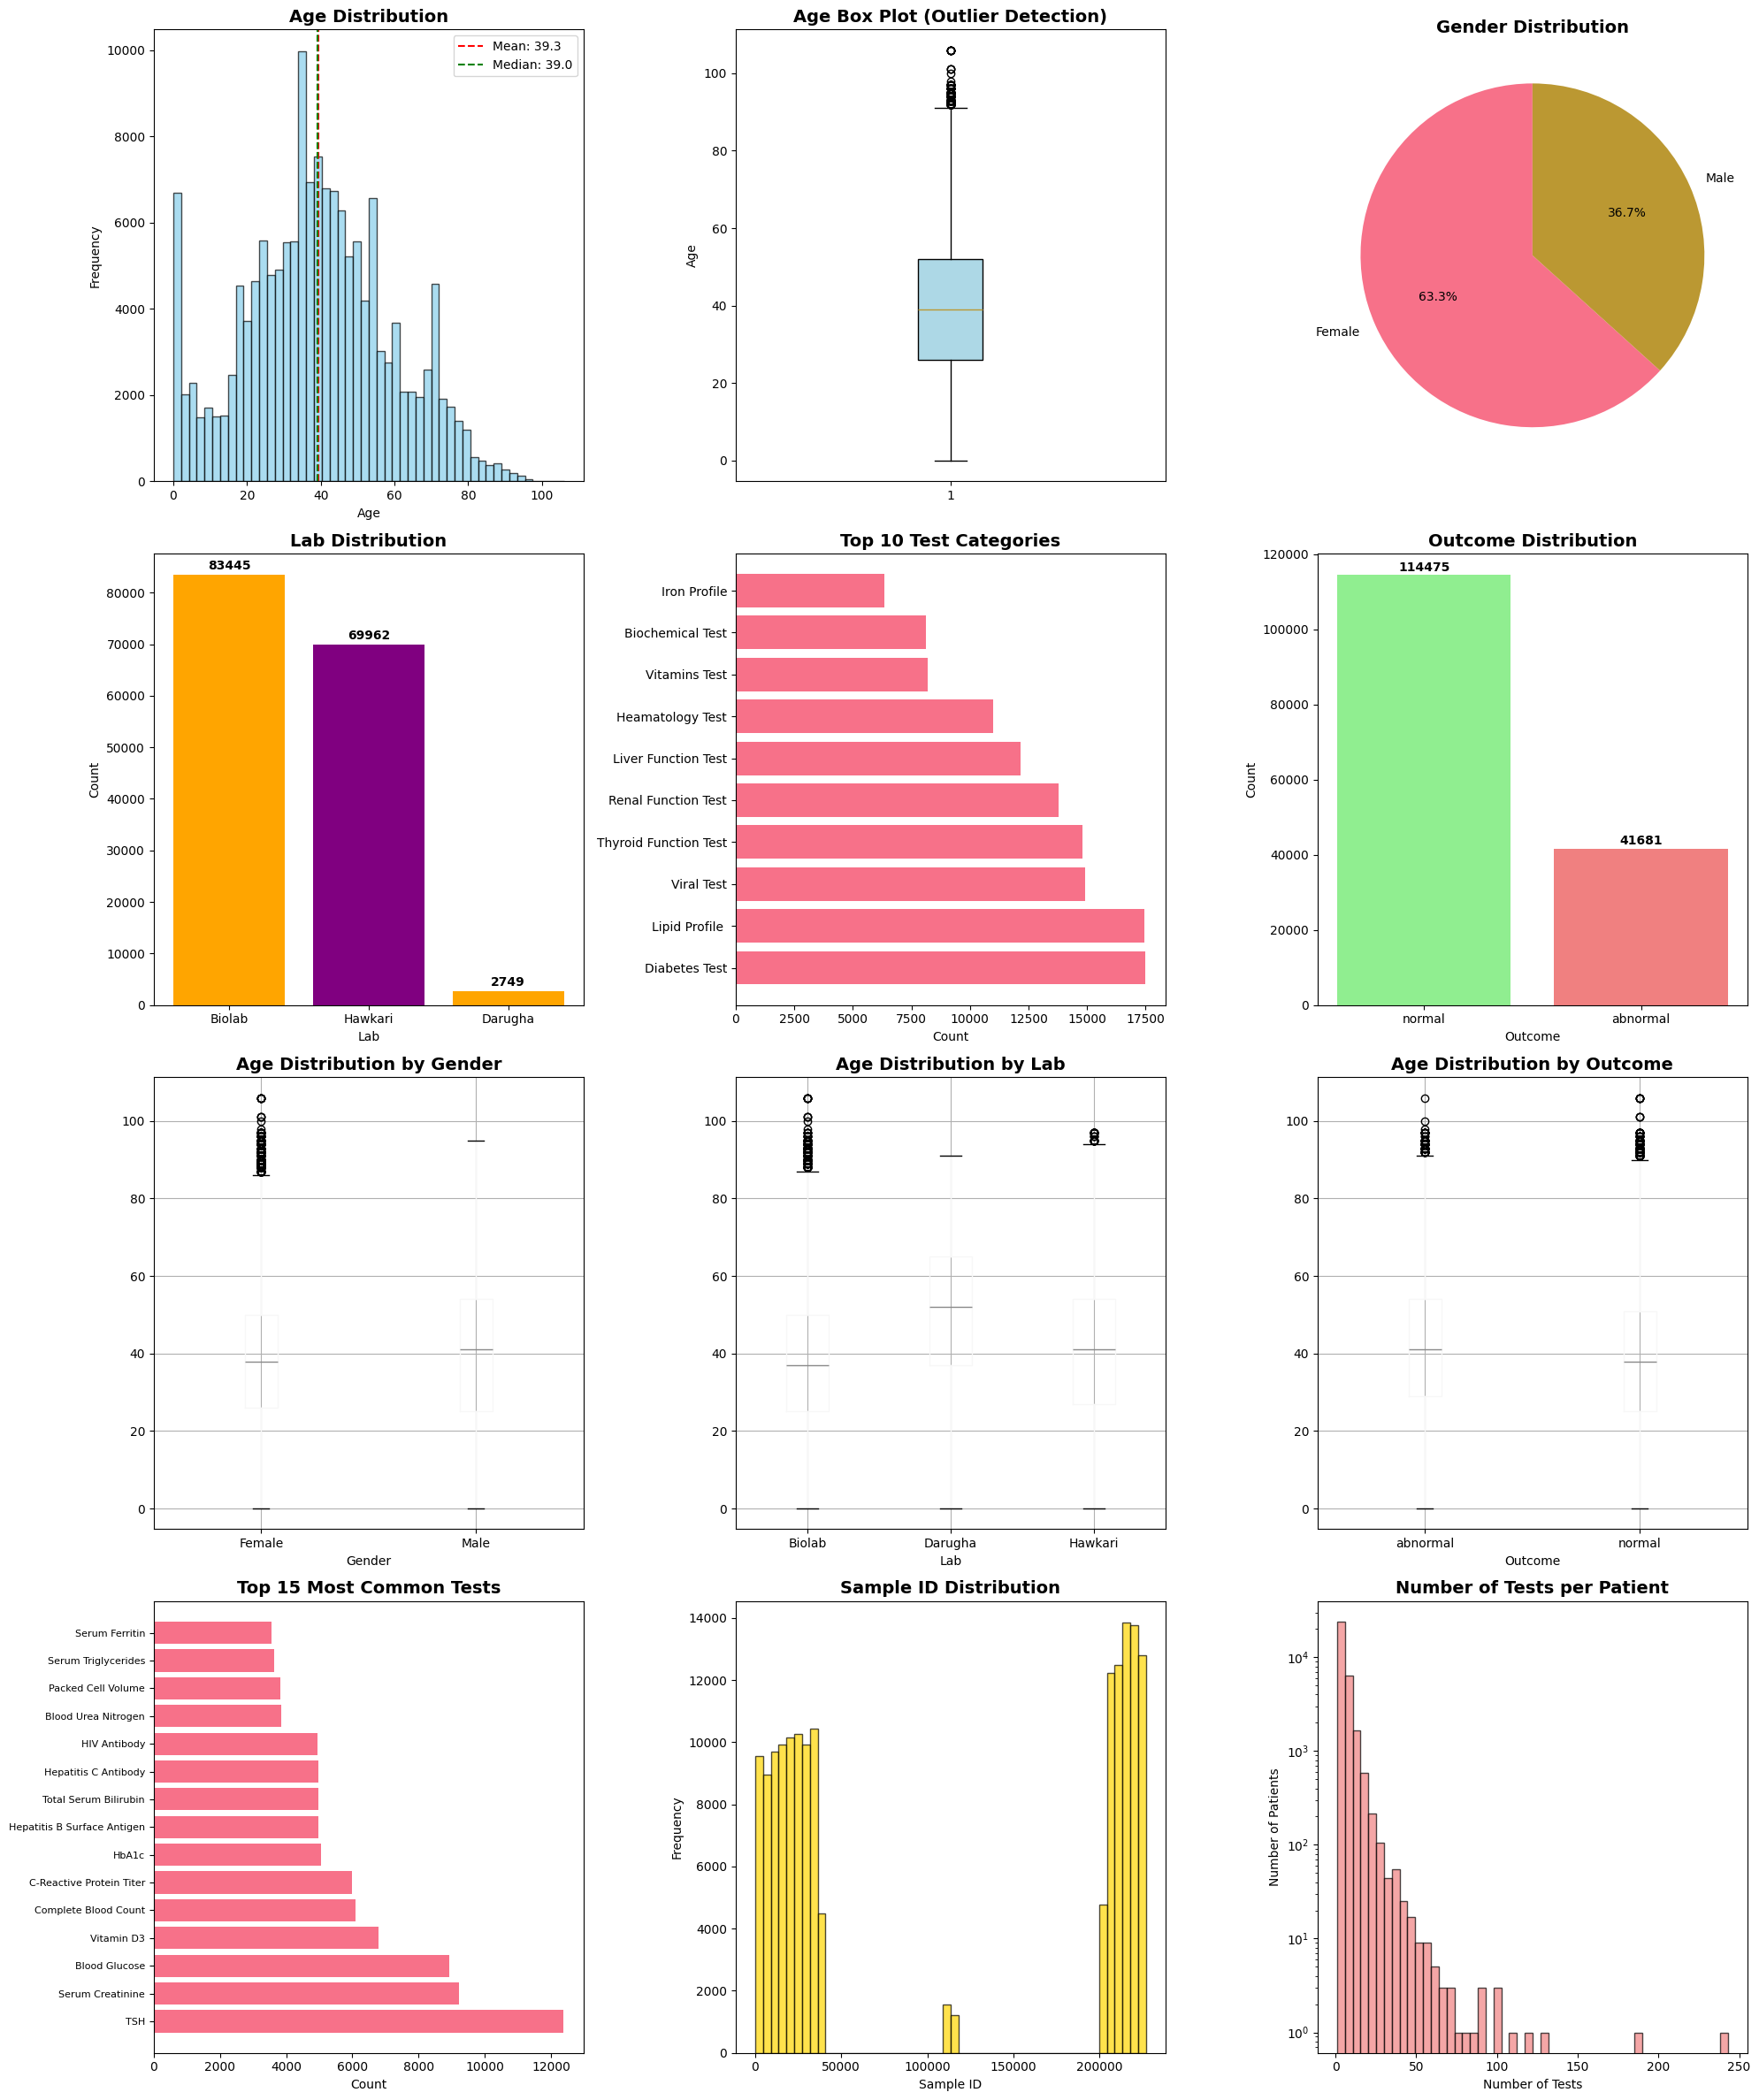

=== DETAILED DATA QUALITY ANALYSIS ===
Dataset Shape: (156156, 13)
Date Range: The data covers from the earliest to latest dates

=== AGE ANALYSIS ===
Age Statistics:
  Mean: 39.32
  Median: 39.00
  Min: 0.00
  Max: 106.00
  Standard Deviation: 19.83
  Age outliers detected: 362 records
  Outlier age range: 92.0 - 106.0


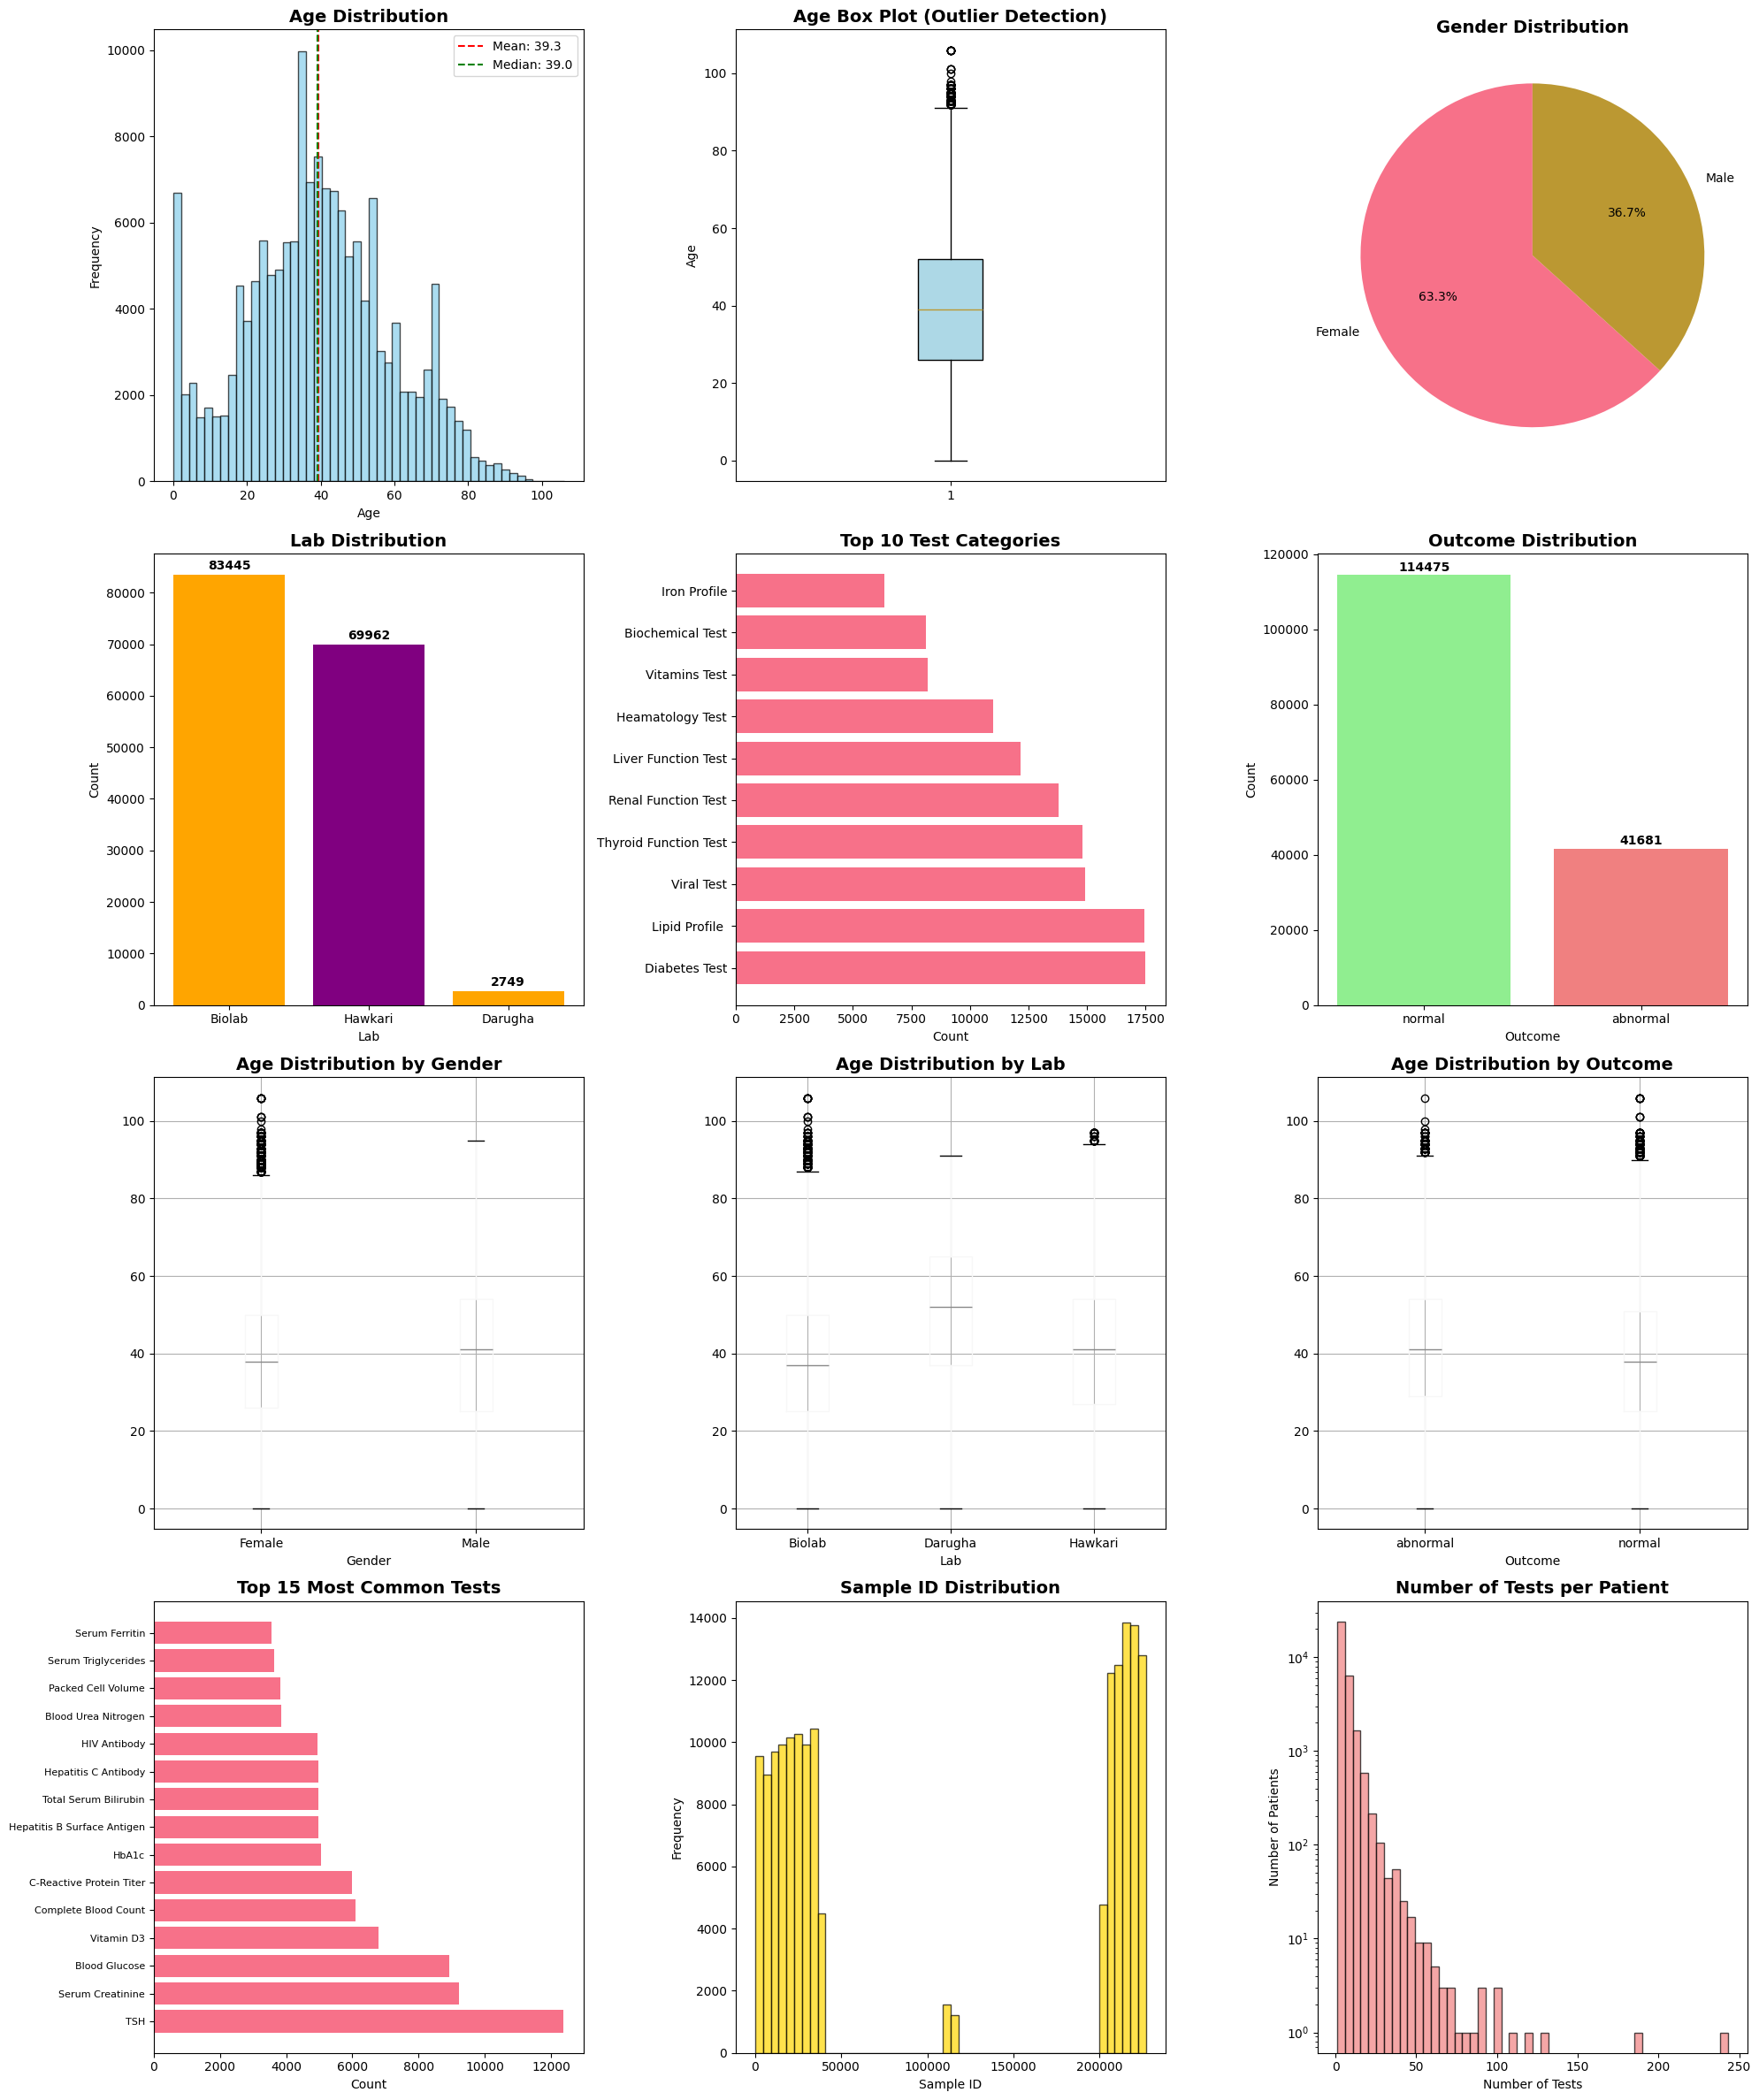

=== DETAILED DATA QUALITY ANALYSIS ===
Dataset Shape: (156156, 13)
Date Range: The data covers from the earliest to latest dates

=== AGE ANALYSIS ===
Age Statistics:
  Mean: 39.32
  Median: 39.00
  Min: 0.00
  Max: 106.00
  Standard Deviation: 19.83
  Age outliers detected: 362 records
  Outlier age range: 92.0 - 106.0


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(20, 24))

# 1. Age Distribution
plt.subplot(4, 3, 1)
plt.hist(df['Age'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='--', label=f'Median: {df["Age"].median():.1f}')
plt.legend()

# 2. Age Box Plot to identify outliers
plt.subplot(4, 3, 2)
box_plot = plt.boxplot(df['Age'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
plt.title('Age Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
plt.ylabel('Age')

# 3. Gender Distribution
plt.subplot(4, 3, 3)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

# 4. Lab Distribution
plt.subplot(4, 3, 4)
lab_counts = df['Lab'].value_counts()
plt.bar(lab_counts.index, lab_counts.values, color=['orange', 'purple'])
plt.title('Lab Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Lab')
plt.ylabel('Count')
for i, v in enumerate(lab_counts.values):
    plt.text(i, v + 1000, str(v), ha='center', fontweight='bold')

# 5. Category Distribution
plt.subplot(4, 3, 5)
category_counts = df['Category'].value_counts().head(10)
plt.barh(range(len(category_counts)), category_counts.values)
plt.yticks(range(len(category_counts)), category_counts.index, fontsize=10)
plt.title('Top 10 Test Categories', fontsize=14, fontweight='bold')
plt.xlabel('Count')

# 6. Outcome Distribution
plt.subplot(4, 3, 6)
outcome_counts = df['Outcome'].value_counts()
colors = ['lightgreen', 'lightcoral']
plt.bar(outcome_counts.index, outcome_counts.values, color=colors)
plt.title('Outcome Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Outcome')
plt.ylabel('Count')
for i, v in enumerate(outcome_counts.values):
    plt.text(i, v + 1000, str(v), ha='center', fontweight='bold')

# 7. Age by Gender Box Plot
plt.subplot(4, 3, 7)
df.boxplot(column='Age', by='Gender', ax=plt.gca())
plt.title('Age Distribution by Gender', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

# 8. Age by Lab Box Plot
plt.subplot(4, 3, 8)
df.boxplot(column='Age', by='Lab', ax=plt.gca())
plt.title('Age Distribution by Lab', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

# 9. Age by Outcome Box Plot
plt.subplot(4, 3, 9)
df.boxplot(column='Age', by='Outcome', ax=plt.gca())
plt.title('Age Distribution by Outcome', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

# 10. Top 15 Most Common Tests
plt.subplot(4, 3, 10)
top_tests = df['Standard Test Name'].value_counts().head(15)
plt.barh(range(len(top_tests)), top_tests.values)
plt.yticks(range(len(top_tests)), [name[:30] + '...' if len(name) > 30 else name for name in top_tests.index], fontsize=8)
plt.title('Top 15 Most Common Tests', fontsize=14, fontweight='bold')
plt.xlabel('Count')

# 11. Sample ID distribution to check for patterns
plt.subplot(4, 3, 11)
plt.hist(df['Sample ID'], bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.title('Sample ID Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sample ID')
plt.ylabel('Frequency')

# 12. Records per Patient (to identify potential duplicates)
plt.subplot(4, 3, 12)
patient_test_counts = df['Patient Name'].value_counts()
plt.hist(patient_test_counts, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Number of Tests per Patient', fontsize=14, fontweight='bold')
plt.xlabel('Number of Tests')
plt.ylabel('Number of Patients')
plt.yscale('log')  # Log scale due to likely skewed distribution

plt.tight_layout()
plt.show()

# Additional detailed analysis
print("=== DETAILED DATA QUALITY ANALYSIS ===")
print(f"Dataset Shape: {df.shape}")
print(f"Date Range: The data covers from the earliest to latest dates")

# Age Analysis
print(f"\n=== AGE ANALYSIS ===")
print(f"Age Statistics:")
print(f"  Mean: {df['Age'].mean():.2f}")
print(f"  Median: {df['Age'].median():.2f}")
print(f"  Min: {df['Age'].min():.2f}")
print(f"  Max: {df['Age'].max():.2f}")
print(f"  Standard Deviation: {df['Age'].std():.2f}")

# Identify potential age outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"  Age outliers detected: {len(outliers)} records")
if len(outliers) > 0:
    print(f"  Outlier age range: {outliers['Age'].min():.1f} - {outliers['Age'].max():.1f}")
import warnings
warnings.filterwarnings('ignore')

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(20, 24))

# 1. Age Distribution
plt.subplot(4, 3, 1)
plt.hist(df['Age'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='--', label=f'Median: {df["Age"].median():.1f}')
plt.legend()

# 2. Age Box Plot to identify outliers
plt.subplot(4, 3, 2)
box_plot = plt.boxplot(df['Age'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
plt.title('Age Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
plt.ylabel('Age')

# 3. Gender Distribution
plt.subplot(4, 3, 3)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

# 4. Lab Distribution
plt.subplot(4, 3, 4)
lab_counts = df['Lab'].value_counts()
plt.bar(lab_counts.index, lab_counts.values, color=['orange', 'purple'])
plt.title('Lab Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Lab')
plt.ylabel('Count')
for i, v in enumerate(lab_counts.values):
    plt.text(i, v + 1000, str(v), ha='center', fontweight='bold')

# 5. Category Distribution
plt.subplot(4, 3, 5)
category_counts = df['Category'].value_counts().head(10)
plt.barh(range(len(category_counts)), category_counts.values)
plt.yticks(range(len(category_counts)), category_counts.index, fontsize=10)
plt.title('Top 10 Test Categories', fontsize=14, fontweight='bold')
plt.xlabel('Count')

# 6. Outcome Distribution
plt.subplot(4, 3, 6)
outcome_counts = df['Outcome'].value_counts()
colors = ['lightgreen', 'lightcoral']
plt.bar(outcome_counts.index, outcome_counts.values, color=colors)
plt.title('Outcome Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Outcome')
plt.ylabel('Count')
for i, v in enumerate(outcome_counts.values):
    plt.text(i, v + 1000, str(v), ha='center', fontweight='bold')

# 7. Age by Gender Box Plot
plt.subplot(4, 3, 7)
df.boxplot(column='Age', by='Gender', ax=plt.gca())
plt.title('Age Distribution by Gender', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

# 8. Age by Lab Box Plot
plt.subplot(4, 3, 8)
df.boxplot(column='Age', by='Lab', ax=plt.gca())
plt.title('Age Distribution by Lab', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

# 9. Age by Outcome Box Plot
plt.subplot(4, 3, 9)
df.boxplot(column='Age', by='Outcome', ax=plt.gca())
plt.title('Age Distribution by Outcome', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title

# 10. Top 15 Most Common Tests
plt.subplot(4, 3, 10)
top_tests = df['Standard Test Name'].value_counts().head(15)
plt.barh(range(len(top_tests)), top_tests.values)
plt.yticks(range(len(top_tests)), [name[:30] + '...' if len(name) > 30 else name for name in top_tests.index], fontsize=8)
plt.title('Top 15 Most Common Tests', fontsize=14, fontweight='bold')
plt.xlabel('Count')

# 11. Sample ID distribution to check for patterns
plt.subplot(4, 3, 11)
plt.hist(df['Sample ID'], bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.title('Sample ID Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sample ID')
plt.ylabel('Frequency')

# 12. Records per Patient (to identify potential duplicates)
plt.subplot(4, 3, 12)
patient_test_counts = df['Patient Name'].value_counts()
plt.hist(patient_test_counts, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Number of Tests per Patient', fontsize=14, fontweight='bold')
plt.xlabel('Number of Tests')
plt.ylabel('Number of Patients')
plt.yscale('log')  # Log scale due to likely skewed distribution

plt.tight_layout()
plt.show()

# Additional detailed analysis
print("=== DETAILED DATA QUALITY ANALYSIS ===")
print(f"Dataset Shape: {df.shape}")
print(f"Date Range: The data covers from the earliest to latest dates")

# Age Analysis
print(f"\n=== AGE ANALYSIS ===")
print(f"Age Statistics:")
print(f"  Mean: {df['Age'].mean():.2f}")
print(f"  Median: {df['Age'].median():.2f}")
print(f"  Min: {df['Age'].min():.2f}")
print(f"  Max: {df['Age'].max():.2f}")
print(f"  Standard Deviation: {df['Age'].std():.2f}")

# Identify potential age outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"  Age outliers detected: {len(outliers)} records")
if len(outliers) > 0:
    print(f"  Outlier age range: {outliers['Age'].min():.1f} - {outliers['Age'].max():.1f}")

In [6]:

# Prepare the dataframe for classification and create dataframes for each test combination

# First, let's examine the structure of our main dataset
print("=== MAIN DATASET STRUCTURE ===")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Sample data:")
print(df.head())

# Check the outcome distribution
print(f"\n=== OUTCOME DISTRIBUTION ===")
print(df['Outcome'].value_counts())
print(f"Outcome percentages:")
print(df['Outcome'].value_counts(normalize=True) * 100)

# Check for null values in key columns
print(f"\n=== DATA QUALITY CHECK ===")
key_columns = ['Patient Name', 'Standard Test Name', 'Outcome', 'Result', 'Gender', 'Lab']
for col in key_columns:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        print(f"{col}: {null_count} null values ({null_count/len(df)*100:.2f}%)")

# Get unique test names to understand what we're working with
print(f"\n=== AVAILABLE TESTS ===")
print(f"Total unique tests: {df['Standard Test Name'].nunique()}")
test_counts = df['Standard Test Name'].value_counts()
print(f"Top 10 most common tests:")
print(test_counts.head(10))

=== MAIN DATASET STRUCTURE ===
Shape: (157242, 13)
Columns: ['Sample ID', 'Patient Name', 'Gender', 'DOB', 'Test Name', 'Unit', 'Category', 'Result', 'DOS', 'Standard Test Name', 'Lab', 'Age', 'Outcome']
Sample data:
   Sample ID              Patient Name  Gender         DOB    Test Name  \
0        118        Xalil Ahmad Mhamad    Male  16/04/1959  Blood Sugar   
1        126                 Dyar Omar    Male  16/04/1986  Blood Sugar   
2        132         Fatah Mhamad Qadr    Male  16/04/1970  Blood Sugar   
3        177         Sesna Qubad Anwar  Female  17/04/1973  Blood Sugar   
4        179  Bayan Abdulla Abdurahman  Female  17/04/1981  Blood Sugar   

    Unit       Category Result         DOS Standard Test Name     Lab   Age  \
0  mg/dl  Diabetes Test     95  16/04/2023        Blood Sugar  Biolab  64.0   
1  mg/dl  Diabetes Test     86  16/04/2023        Blood Sugar  Biolab  37.0   
2  mg/dl  Diabetes Test     84  16/04/2023        Blood Sugar  Biolab  53.0   
3  mg/dl  Diabet

In [32]:
df.to_csv('cleaned_all_lab_tests.csv', index=False)

In [7]:
from fuzzywuzzy import fuzz
from collections import defaultdict
# Lets optimize more, adding one more constraint
# their first name should match exactly or mismatch only on one character.

def find_similar_names_v2(df, similarity_threshold=65):
    """
    Find similar patient names using fuzzy matching with first name constraint
    Returns groups of similar names that share the same LAB, DOB, and have similar first names
    """
    
    def first_names_similar(name1, name2):
        """Check if first names match exactly or have only one character difference"""
        first1 = name1.split()[0].lower()
        first2 = name2.split()[0].lower()
        
        # Exact match
        if first1 == first2:
            return True
        
        # Check if only one character difference
        if abs(len(first1) - len(first2)) > 1:
            return False
        
        # Count character differences
        differences = 0
        min_len = min(len(first1), len(first2))
        max_len = max(len(first1), len(first2))
        

        for i in range(min_len):
            if first1[i] != first2[i]:
                differences += 1
        
        # Add difference for length mismatch
        differences += max_len - min_len
        
        return differences <= 1
    
    # Group by LAB and DOB first to reduce comparison space
    grouped = df.groupby(['Lab', 'DOB'])
    similar_groups = []
    
    for (lab, dob), group in grouped:
        unique_names = group['Patient Name'].unique()
        
        if len(unique_names) > 1:
            processed_names = set()
            
            for i, name1 in enumerate(unique_names):
                if name1 in processed_names:
                    continue
                    
                current_group = [name1]
                processed_names.add(name1)
                
                for name2 in unique_names[i+1:]:
                    if name2 not in processed_names:
                        # Check both fuzzy similarity and first name constraint
                        similarity = fuzz.ratio(name1.lower(), name2.lower())
                        if (similarity >= similarity_threshold and 
                            first_names_similar(name1, name2)):
                            current_group.append(name2)
                            processed_names.add(name2)
                
                if len(current_group) > 1:
                    similar_groups.append({
                        'lab': lab,
                        'dob': dob,
                        'similar_names': current_group,
                        'count': len(current_group)
                    })
    
    return similar_groups

# Test the improved function
similar_name_groups_v2 = find_similar_names_v2(df, 85)

print(f"Found {len(similar_name_groups_v2)} groups of similar names with first name constraint")
print("\nFirst 20 groups:")
for i, group in enumerate(similar_name_groups_v2[:20]):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")

d:\Research\mhmd_mawlawi\health_data\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Found 39 groups of similar names with first name constraint

First 20 groups:

Group 1:
  Lab: Biolab
  DOB: 1/6/2022
  Similar names (2): ['Kyan Ranj Jamal', 'Kian Ranj Jamal']

Group 2:
  Lab: Biolab
  DOB: 1/9/2022
  Similar names (2): ['Kyana Barham Latef', 'Dyana Barham Latef']

Group 3:
  Lab: Biolab
  DOB: 13/06/1962
  Similar names (2): ['Xanm Hamaamin Hamasalh', 'Xanm Hama Amin Hamasalih']

Group 4:
  Lab: Biolab
  DOB: 14/05/1993
  Similar names (2): ['Avin Taha Mhamad', 'Avin Taha Muhammed']

Group 5:
  Lab: Biolab
  DOB: 15/07/2009
  Similar names (2): ['Inas Hoshmand', 'Enas Hoshmand']

Group 6:
  Lab: Biolab
  DOB: 20/04/1957
  Similar names (2): ['Taiba Mahmud Maulud', 'Taiba Mahmud maulud']

Group 7:
  Lab: Biolab
  DOB: 20/04/1987
  Similar names (2): ['Hawsar Kamal Mhamad', 'Hawsar Kam,al Mhamad']

Group 8:
  Lab: Biolab
  DOB: 20/08/1991
  Similar names (2): ['Avan Abdulaziz Fatah', 'Avan Abdulazizi Fatah']

Group 9:
  Lab: Biolab
  DOB: 20/09/1982
  Similar names (2

In [8]:
fine_tuning = [95,90,85, 80, 75, 70, 65, 60]

for i in fine_tuning:
    similar_name_groups = find_similar_names_v2(df, i)
    print(f"Found {len(similar_name_groups)} groups of similar names with threshold {i}")

Found 20 groups of similar names with threshold 95
Found 35 groups of similar names with threshold 90
Found 39 groups of similar names with threshold 85
Found 46 groups of similar names with threshold 80
Found 51 groups of similar names with threshold 75
Found 62 groups of similar names with threshold 70
Found 76 groups of similar names with threshold 65
Found 90 groups of similar names with threshold 60


In [9]:
# Test the improved function
similar_name_groups_v2 = find_similar_names_v2(df, 70)

print(f"Found {len(similar_name_groups_v2)} groups of similar names with first name constraint")
print("\nGroups for 70% threshold:")
for i, group in enumerate(similar_name_groups_v2):
    print(f"\nGroup {i+1}:")
    print(f"  Lab: {group['lab']}")
    print(f"  DOB: {group['dob']}")
    print(f"  Similar names ({group['count']}): {group['similar_names']}")

Found 62 groups of similar names with first name constraint

Groups for 70% threshold:

Group 1:
  Lab: Biolab
  DOB: 1/11/2024
  Similar names (2): ['Ela Arian Ali', 'Ela Aryan']

Group 2:
  Lab: Biolab
  DOB: 1/12/2024
  Similar names (2): ['Shahan Shkar', 'Shahan Shkar Xalid']

Group 3:
  Lab: Biolab
  DOB: 1/6/2022
  Similar names (2): ['Kyan Ranj Jamal', 'Kian Ranj Jamal']

Group 4:
  Lab: Biolab
  DOB: 1/9/2022
  Similar names (2): ['Kyana Barham Latef', 'Dyana Barham Latef']

Group 5:
  Lab: Biolab
  DOB: 10/7/1971
  Similar names (2): ['Muhamad Abdulla', 'Muhamad Abdulla Hasan']

Group 6:
  Lab: Biolab
  DOB: 13/01/1967
  Similar names (2): ['Ali Mhamad Saed', 'Ali Muhammed saheed']

Group 7:
  Lab: Biolab
  DOB: 13/06/1962
  Similar names (2): ['Xanm Hamaamin Hamasalh', 'Xanm Hama Amin Hamasalih']

Group 8:
  Lab: Biolab
  DOB: 14/05/1993
  Similar names (2): ['Avin Taha Mhamad', 'Avin Taha Muhammed']

Group 9:
  Lab: Biolab
  DOB: 15/07/2009
  Similar names (2): ['Inas Hoshma

In [10]:
specials=[
          ['Inas Hoshmand', 'Enas Hoshmand'],
          ['Banan Ali', 'Bayan Aziz Ali'],
          ['kovan mahamad amanj', 'Rovan Muhamad Amanj'],
          ['Aiman Rebwar Muhammed', 'Aiman Rebwar Omar'],
          ['Dlin Aso Omar', 'Alin Aso Omar'],
          ['Muhamad Kosar Ahmad', 'Muhamad Sleman Muhamad'],
          ['Shirin Amin Mhamad', 'Shirin Abdulrahman Ahmad'],
          ['Shirin mhamad  Pirwais', 'Shirin Mhamad Rostam'],
          ['Shahla karim Mhamad', 'Shahla Mhamad Axa'],
          ['Shoxan Mhamad Faraj', 'shoxan Mhamad Amin'],
          ['naxshin tahir ahmad', 'Naxshin Salh Hama Murad'],
          ['Shirin faraj mhamad', 'shirin rahman ahmad'],
          ['swmaya jalal abdwlla', 'swmaya mahmud abdwlla'],
          ]

# lets go with 70 percent
# rename the second matching name with the first one for threshold of 70 in the df and do not do it when the name is one of the specials

similar_name_groups = find_similar_names_v2(df, 70)
# Create a set of special name pairs for faster lookup
special_pairs = set()
for pair in specials:
    special_pairs.add((pair[0].lower().strip(), pair[1].lower().strip()))
    special_pairs.add((pair[1].lower().strip(), pair[0].lower().strip()))  # Add reverse pair

print(f"Number of Unique names in the df BEFORE the renaming: {df['Patient Name'].nunique()}")

for group in similar_name_groups:
    if len(group['similar_names']) > 1:
        # Check if this is a special case that should not be renamed
        name1 = group['similar_names'][0].lower().strip()
        name2 = group['similar_names'][1].lower().strip()
        
        if (name1, name2) not in special_pairs:
            # Only rename if it's not a special case
            df.loc[df['Patient Name'] == group['similar_names'][1], 'Patient Name'] = group['similar_names'][0]

print(f"Number of Unique names in the df AFTER the renaming: {df['Patient Name'].nunique()}")

Number of Unique names in the df BEFORE the renaming: 33335
Number of Unique names in the df AFTER the renaming: 33286


In [33]:
# Task 1: Analyze test frequencies and remove tests with small frequencies

print("=== ANALYZING TEST FREQUENCIES ===")
print(f"Total records before filtering: {len(df):,}")

# Get test frequency distribution
test_frequency = df['Standard Test Name'].value_counts()
print(f"Total unique tests: {len(test_frequency)}")

# Show distribution of test frequencies
print(f"\n=== TEST FREQUENCY DISTRIBUTION ===")
print(f"Tests with 1-10 records: {(test_frequency <= 10).sum()}")
print(f"Tests with 11-50 records: {((test_frequency > 10) & (test_frequency <= 50)).sum()}")
print(f"Tests with 51-100 records: {((test_frequency > 50) & (test_frequency <= 100)).sum()}")
print(f"Tests with 101-500 records: {((test_frequency > 100) & (test_frequency <= 500)).sum()}")
print(f"Tests with 501-1000 records: {((test_frequency > 500) & (test_frequency <= 1000)).sum()}")
print(f"Tests with 1001-3000 records: {((test_frequency > 1000) & (test_frequency <= 3000)).sum()}")
print(f"Tests with >3000 records: {(test_frequency > 3000).sum()}")

# Define threshold for removing low-frequency tests
min_frequency_threshold = 1000
low_frequency_tests = test_frequency[test_frequency < min_frequency_threshold].index.tolist()

print(f"\n=== TESTS TO REMOVE (less than {min_frequency_threshold} records) ===")
print(f"Number of tests to remove: {len(low_frequency_tests)}")
print(f"Records to be removed: {test_frequency[test_frequency < min_frequency_threshold].sum():,}")

# Show the tests that will be removed
print(f"\nTests being removed:")
for i, test in enumerate(low_frequency_tests[:20], 1):
    count = test_frequency[test]
    print(f"{i:2d}. {test}: {count} records")
if len(low_frequency_tests) > 20:
    print(f"... and {len(low_frequency_tests) - 20} more tests")

# Remove low-frequency tests
df_filtered = df[~df['Standard Test Name'].isin(low_frequency_tests)].copy()

print(f"\n=== RESULTS AFTER FILTERING ===")
print(f"Records before filtering: {len(df):,}")
print(f"Records after filtering: {len(df_filtered):,}")
print(f"Records removed: {len(df) - len(df_filtered):,}")
print(f"Percentage of records retained: {len(df_filtered)/len(df)*100:.1f}%")

print(f"\nTests before filtering: {df['Standard Test Name'].nunique()}")
print(f"Tests after filtering: {df_filtered['Standard Test Name'].nunique()}")
print(f"Tests removed: {df['Standard Test Name'].nunique() - df_filtered['Standard Test Name'].nunique()}")

# Show the most common tests after filtering
print(f"\n=== TOP 20 MOST COMMON TESTS AFTER FILTERING ===")
filtered_test_freq = df_filtered['Standard Test Name'].value_counts()
for i, (test, count) in enumerate(filtered_test_freq.head(20).items(), 1):
    percentage = count / len(df_filtered) * 100
    print(f"{i:2d}. {test}: {count:,} ({percentage:.1f}%)")

# Update the main dataframe
df = df_filtered.copy()
print(f"\n✅ Dataset filtered successfully!")
print(f"📊 New dataset size: {len(df):,} records with {df['Standard Test Name'].nunique()} unique tests")

=== ANALYZING TEST FREQUENCIES ===
Total records before filtering: 156,156
Total unique tests: 215

=== TEST FREQUENCY DISTRIBUTION ===
Tests with 1-10 records: 76
Tests with 11-50 records: 34
Tests with 51-100 records: 18
Tests with 101-500 records: 40
Tests with 501-1000 records: 5
Tests with 1001-3000 records: 25
Tests with >3000 records: 17

=== TESTS TO REMOVE (less than 1000 records) ===
Number of tests to remove: 173
Records to be removed: 17,376

Tests being removed:
 1. Luteinizing Hormone: 847 records
 2. Testosterone: 836 records
 3. Prostate-Specific Antigen: 832 records
 4. HDL Cholesterol: 705 records
 5. Fecal Calprotectein Titer: 550 records
 6. Serum Albumin: 485 records
 7. Prothrombin Time: 484 records
 8. International Normalized Ratio: 479 records
 9. Serum Uric Acid: 464 records
10. C-Reactive Protein: 456 records
11. Thyroxine (T4): 437 records
12. Helicobacter pylori Antigen: 430 records
13. D-Dimer: 418 records
14. S.Zinc: 413 records
15. Bleeding Time: 382 rec

In [34]:
df['Standard Test Name'].nunique()

42

In [35]:
df.to_csv('cleaned_42_tests.csv', index=False)

In [28]:
df.head()

,Sample ID,Patient Name,Gender,DOB,Test Name,Unit,Category,Result,DOS,Standard Test Name,Lab,Age,Outcome
0,118,Xalil Ahmad Mhamad,Male,16/04/1959,Blood Sugar,mg/dl,Diabetes Test,95,16/04/2023,Blood Sugar,Biolab,64.0,normal
1,126,Dyar Omar,Male,16/04/1986,Blood Sugar,mg/dl,Diabetes Test,86,16/04/2023,Blood Sugar,Biolab,37.0,normal
2,132,Fatah Mhamad Qadr,Male,16/04/1970,Blood Sugar,mg/dl,Diabetes Test,84,16/04/2023,Blood Sugar,Biolab,53.0,normal
3,177,Sesna Qubad Anwar,Female,17/04/1973,Blood Sugar,mg/dl,Diabetes Test,84,17/04/2023,Blood Sugar,Biolab,50.0,normal
4,179,Bayan Abdulla Abdurahman,Female,17/04/1981,Blood Sugar,mg/dl,Diabetes Test,96,17/04/2023,Blood Sugar,Biolab,42.0,normal


In [29]:
df['Sample ID'].describe()

count    156156.000000
mean      17428.759158
std        9605.857457
min          85.000000
25%        9716.000000
50%       16929.000000
75%       24368.250000
max       38248.000000
Name: Sample ID, dtype: float64